<a href="https://colab.research.google.com/github/eovallemagallanes/Digital-Image-Processing/blob/main/Analisis_Histogramas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análisis de histogramas**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [3]:
def add_ruido(img, mean=0, stddev=180):
    noise = np.zeros(img.shape, np.uint8)
    cv2.randn(noise, mean, stddev)
    noisy_img = cv2.add(img, noise)

    return noisy_img

[]

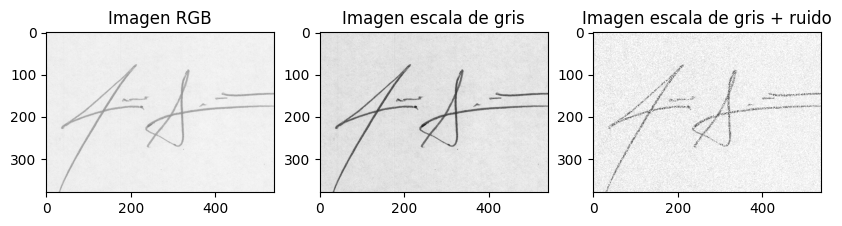

In [4]:
bgr_image = cv2.imread('A_orig_23.png')
rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2GRAY)
noisy_image = add_ruido(gray_image)

plt.figure(figsize=(10,3))
plt.subplot(131)
plt.title("Imagen RGB")
plt.imshow(rgb_image)
plt.subplot(132)
plt.title("Imagen escala de gris")
plt.imshow(gray_image, cmap='gray')
plt.subplot(133)
plt.title("Imagen escala de gris + ruido")
plt.imshow(noisy_image, cmap='gray')
plt.plot()

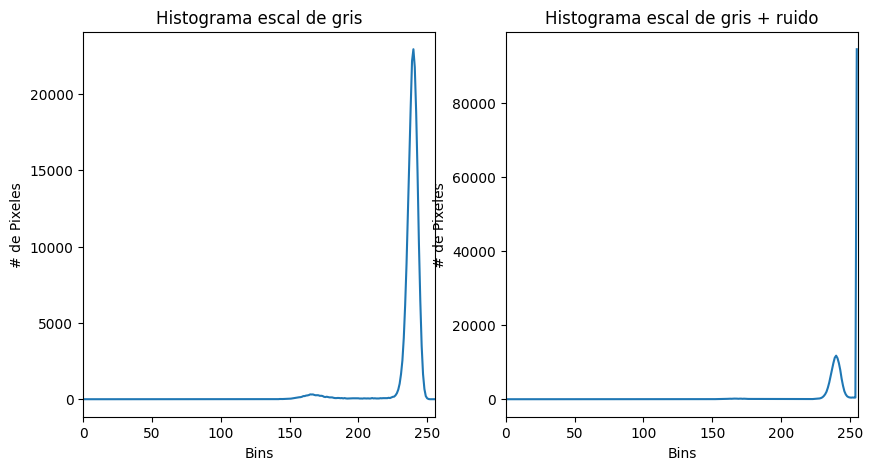

In [5]:
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
#hist /= hist.sum() # para un histograma normalizado

hist_noise = cv2.calcHist([noisy_image], [0], None, [256], [0, 256])

# graficar el histograma
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title("Histograma escal de gris")
plt.xlabel("Bins")
plt.ylabel("# de Pixeles")
plt.plot(hist)
plt.xlim([0, 256])
plt.subplot(122)
plt.title("Histograma escal de gris + ruido")
plt.xlabel("Bins")
plt.ylabel("# de Pixeles")
plt.plot(hist_noise)
plt.xlim([0, 256])
plt.show()

## Eliminación de ruido

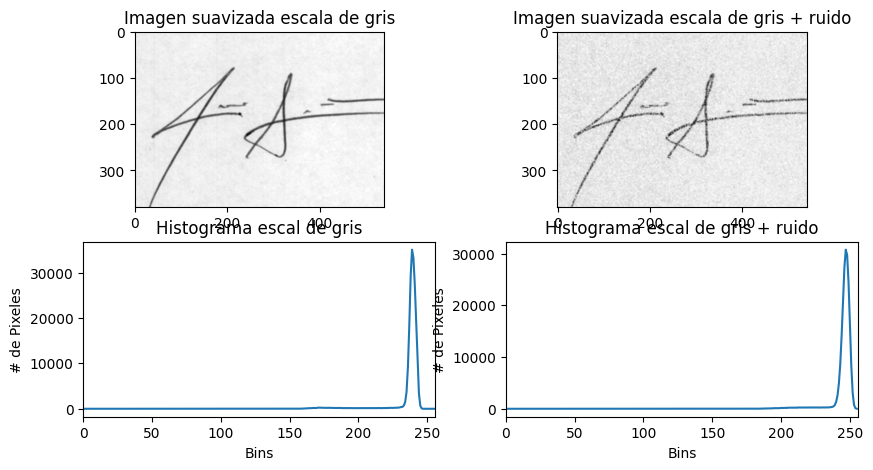

In [6]:
blur_gray_image = cv2.GaussianBlur(gray_image,(5,5),0)
blur_noisy_image = cv2.GaussianBlur(noisy_image,(5,5),0)

hist = cv2.calcHist([blur_gray_image], [0], None, [256], [0, 256])
hist_noise = cv2.calcHist([blur_noisy_image], [0], None, [256], [0, 256])

plt.figure(figsize=(10,5))
plt.subplot(221)
plt.title("Imagen suavizada escala de gris")
plt.imshow(blur_gray_image, cmap='gray')
plt.subplot(222)
plt.title("Imagen suavizada escala de gris + ruido")
plt.imshow(blur_noisy_image, cmap='gray')
plt.subplot(223)
plt.title("Histograma escal de gris")
plt.xlabel("Bins")
plt.ylabel("# de Pixeles")
plt.plot(hist)
plt.xlim([0, 256])
plt.subplot(224)
plt.title("Histograma escal de gris + ruido")
plt.xlabel("Bins")
plt.ylabel("# de Pixeles")
plt.plot(hist_noise)
plt.xlim([0, 256])
plt.show()

## Binarización simple

In [7]:
def simple_thresh(img, th):
    thres_img = np.ones(img.shape, np.uint8)*(img>th)

    return thres_img

Maximo del histograma en escala de gris:  239
Maximo del histograma en escala de gris + ruido:  247


[]

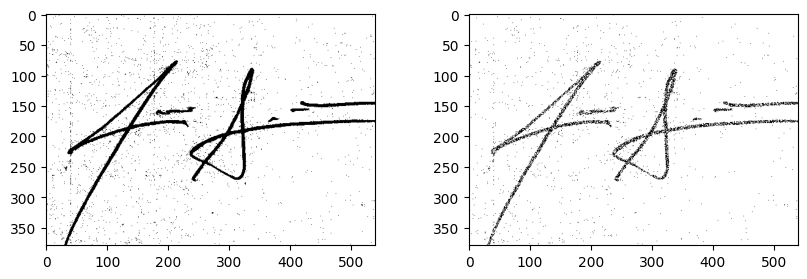

In [8]:
th1 = hist.argmax()
print('Maximo del histograma en escala de gris: ', th1)

th2 = hist_noise.argmax()
print('Maximo del histograma en escala de gris + ruido: ', th2)

thres_img = simple_thresh(gray_image, 230)
thres_noisy_img = simple_thresh(noisy_image, 230)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(thres_img, cmap='gray')
plt.subplot(122)
plt.imshow(thres_noisy_img, cmap='gray')
plt.plot()

Maximo del histograma en escala de gris:  239
Maximo del histograma en escala de gris + ruido:  247


[]

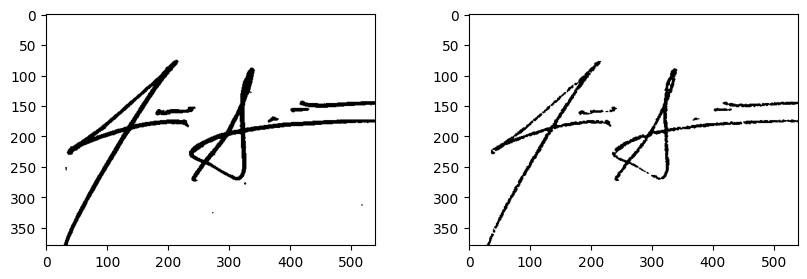

In [9]:
th1 = hist.argmax()
print('Maximo del histograma en escala de gris: ', th1)

th2 = hist_noise.argmax()
print('Maximo del histograma en escala de gris + ruido: ', th2)

thres_img = simple_thresh(blur_gray_image, 230)
thres_noisy_img = simple_thresh(blur_noisy_image, 230)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(thres_img, cmap='gray')
plt.subplot(122)
plt.imshow(thres_noisy_img, cmap='gray')
plt.plot()

## Binarización automática

Umbral de binarización para imagen en escala de gris:  205.0
Umbral de binarización para imagen en escala de gris + ruido:  211.0


[]

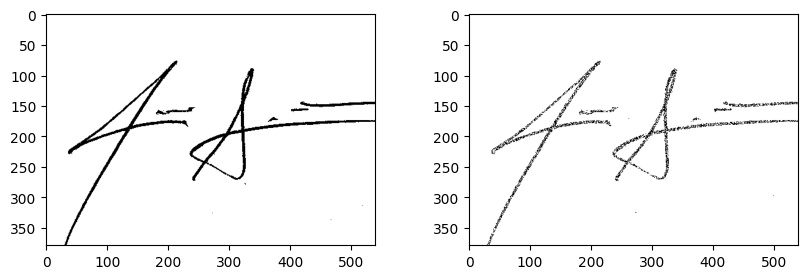

In [10]:
ret1, th_img1 = cv2.threshold(gray_image,0,255,cv2.THRESH_OTSU)
ret2, th_img2 = cv2.threshold(noisy_image,0,255,cv2.THRESH_OTSU)
print('Umbral de binarización para imagen en escala de gris: ', ret1)
print('Umbral de binarización para imagen en escala de gris + ruido: ', ret2)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(th_img1, cmap='gray')
plt.subplot(122)
plt.imshow(th_img2, cmap='gray')
plt.plot()

Umbral de binarización para imagen suavizada en escala de gris:  211.0
Umbral de binarización para imagen suavizada en escala de gris + ruido:  229.0


[]

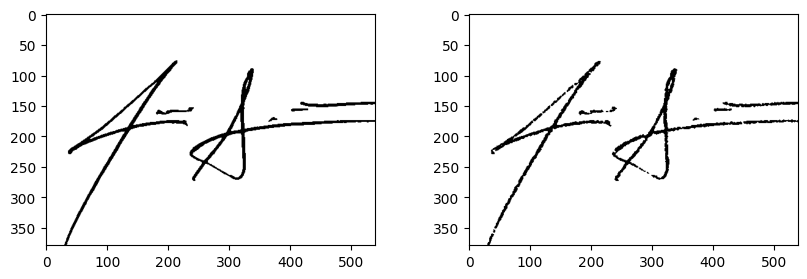

In [11]:
ret3, th_img3 = cv2.threshold(blur_gray_image,0,255,cv2.THRESH_OTSU)
ret4, th_img4 = cv2.threshold(blur_noisy_image,0,255,cv2.THRESH_OTSU)
print('Umbral de binarización para imagen suavizada en escala de gris: ', ret3)
print('Umbral de binarización para imagen suavizada en escala de gris + ruido: ', ret4)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(th_img3, cmap='gray')
plt.subplot(122)
plt.imshow(th_img4, cmap='gray')
plt.plot()

## Operadores morfológicos

### Erosión

[]

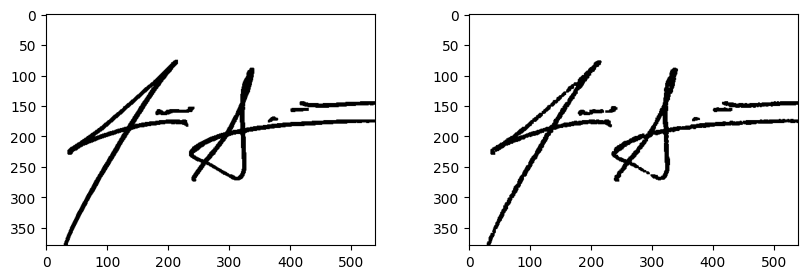

In [12]:
eroded1 = cv2.erode(th_img3.copy(), None, iterations=1)
eroded2 = cv2.erode(th_img4.copy(), None, iterations=1)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(eroded1, cmap='gray')
plt.subplot(122)
plt.imshow(eroded2, cmap='gray')
plt.plot()

### Dilatación

[]

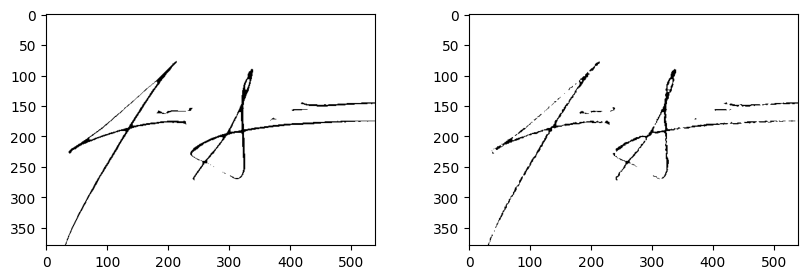

In [13]:
dilated1 = cv2.dilate(th_img3.copy(), None, iterations=1)
dilated2 = cv2.dilate(th_img4.copy(), None, iterations=1)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(dilated1, cmap='gray')
plt.subplot(122)
plt.imshow(dilated2, cmap='gray')
plt.plot()

### Apertura (Erosión + Dilatación)

[]

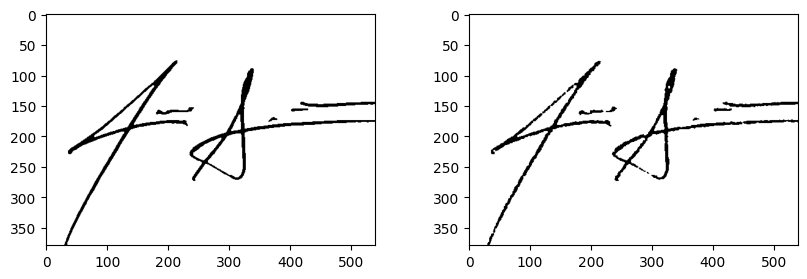

In [14]:
kernelSize = (3,3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize) #VER: MORPH_CROSS, MORHP_RECT, MORPH_ELLIPSE
opening1 = cv2.morphologyEx(th_img3.copy(), cv2.MORPH_OPEN, kernel)
opening2 = cv2.morphologyEx(th_img4.copy(), cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(opening1, cmap='gray')
plt.subplot(122)
plt.imshow(opening2, cmap='gray')
plt.plot()

### Cerradura (Dilatación + Erosión)

[]

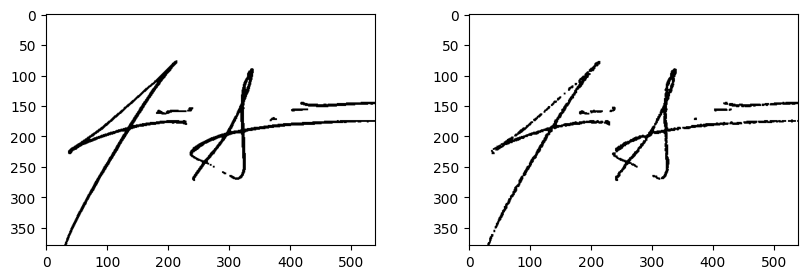

In [15]:
kernelSize = (3,3)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize) #VER: MORPH_CROSS, MORHP_RECT, MORPH_ELLIPSE
closing1 = cv2.morphologyEx(th_img3.copy(), cv2.MORPH_CLOSE, kernel)
closing2 = cv2.morphologyEx(th_img4.copy(), cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.imshow(closing1, cmap='gray')
plt.subplot(122)
plt.imshow(closing2, cmap='gray')
plt.plot()

# **Extracción de características**

## HOG: Histogram of Oriented Gradients

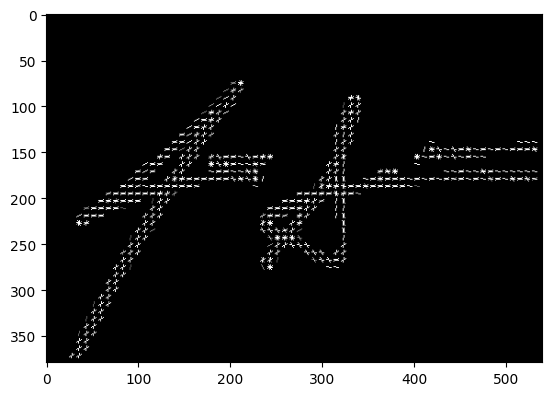

Numero de hog features: 25192
Primeros features normalizados diferentes de cero:
 [0.70710678 0.70710678 0.55297841 0.55297841 0.55297841 0.28747977
 1.         0.43768809 0.87208739 0.21884405]


In [16]:
from skimage.feature import hog, daisy
from skimage import exposure

fd, hog_image = hog(th_img3, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualize=True)

# Rescalar histograma para mejor visualización
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.imshow(hog_image_rescaled, cmap='gray')
plt.show()

print('Numero de hog features:' , len(fd))
print('Primeros features normalizados diferentes de cero:\n', fd[fd>0][:10])

## Momentos de Hu

In [17]:
import math

huMoments = cv2.HuMoments(cv2.moments(th_img3))
print('Hu moments:\n', huMoments)
# Log scale hu moments
for i in range(0,7):
   huMoments[i] = -1* math.copysign(1.0, huMoments[i]) * math.log10(abs(huMoments[i]))

print('Hu moments normalizados:\n', huMoments)


Hu moments:
 [[ 7.38865404e-04]
 [ 5.97788046e-08]
 [ 2.62412156e-14]
 [ 1.52095832e-14]
 [ 2.44196736e-28]
 [ 2.70410341e-18]
 [-1.80821670e-28]]
Hu moments normalizados:
 [[  3.13143467]
 [  7.22345277]
 [ 13.58101605]
 [ 13.81788269]
 [ 27.61226015]
 [ 17.5679767 ]
 [-27.74274952]]


## Momentos de Zernike

In [18]:
!pip install numpy --upgrade
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
import mahotas

radius = 10
zer_feat = mahotas.features.zernike_moments(th_img3, radius, degree=8)
print('Zernike features:\n', zer_feat)

Zernike features:
 [0.31830989 0.00526621 0.00966415 0.01025031 0.01089124 0.00108723
 0.01591863 0.0150199  0.01164942 0.01708268 0.00276535 0.00573299
 0.02166503 0.0162771  0.01504174 0.01640237 0.02367219 0.00591976
 0.00807663 0.01915538 0.02628975 0.01206993 0.01794738 0.0129483
 0.01365946]


## Elementos de la imagen

In [20]:
'''
Statistics output for each label, including the background label, see below for available statistics. Statistics are accessed via stats[label, COLUMN] where available columns are defined below.

cv2.CC_STAT_LEFT The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
cv2.CC_STAT_TOP The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
cv2.CC_STAT_WIDTH The horizontal size of the bounding box
cv2.CC_STAT_HEIGHT The vertical size of the bounding box
cv2.CC_STAT_AREA The total area (in pixels) of the connected component
'''

connectivity = 4 # 4, 8
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(cv2.bitwise_not(th_img3) , connectivity , cv2.CV_32S)
# ojo, invertimos la imagen con cv2.bitwise_not para que el fondo sea negro y la firma blanca


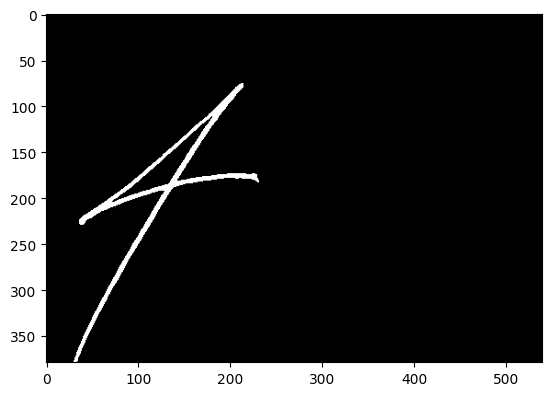

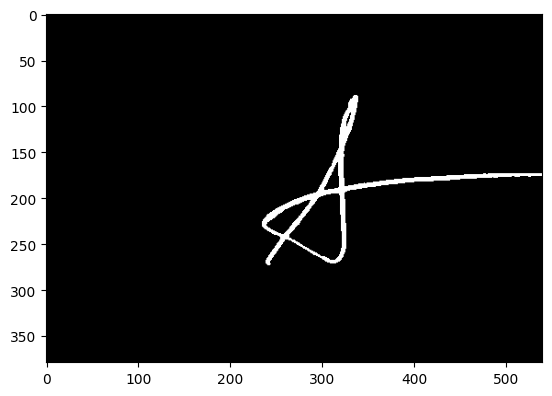

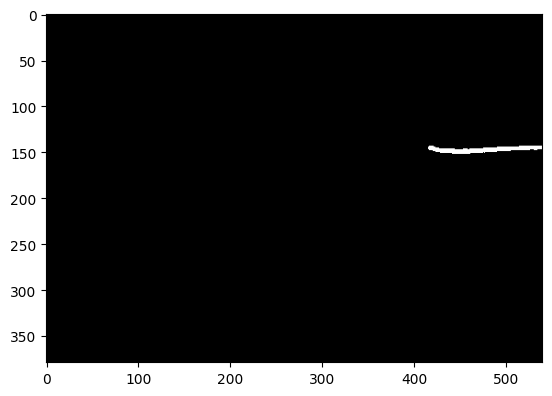

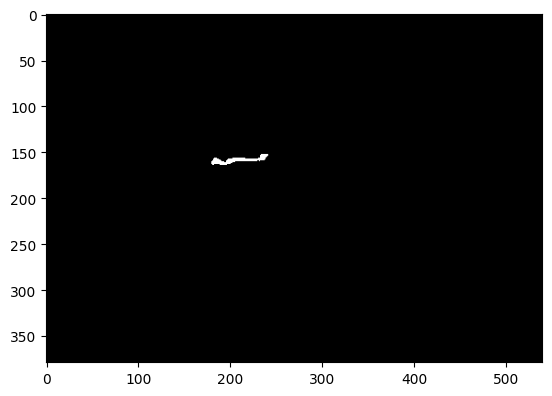

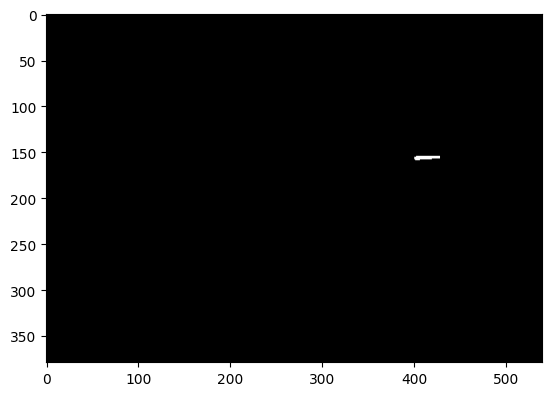

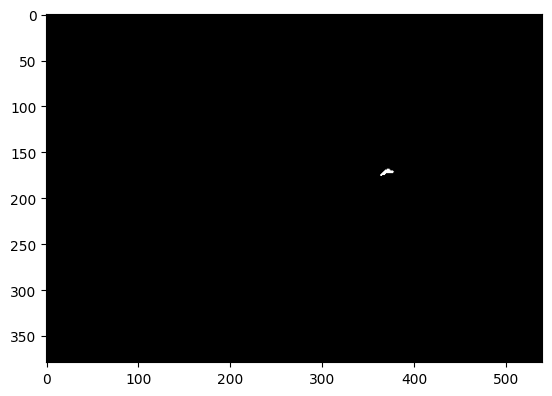

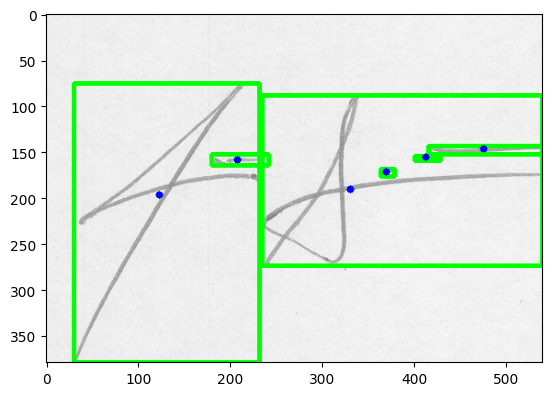

In [21]:
# el elemento 0 es la imagen original
output = rgb_image.copy()
for i in range(1, num_labels):
    img_label = np.ones(th_img3.shape) * (labels==i)
    plt.imshow(img_label, cmap='gray')
    plt.show()

    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

plt.imshow(output)
plt.show()